<a href="https://colab.research.google.com/github/dmunozbe/TFM_DataScience/blob/main/NB_Compraventa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Compraventa**. Variable respuesta

De acuerdo con el objetivo principal del presente TFM, se han recopilado datos de la compraventa de viviendas registradas en El Registro de la Propiedad con una transmision del 100% del dominio de la propiedad a traves del portal [Open Data BCN](https://opendata-ajuntament.barcelona.cat/es).

El precio total de la vivienda, es el precio de la vivienda en miles de €uros que consta en la escritura de compraventa.

El precio por metro cuadrado corresponde a la media del precio de la vivienda por la superficie construida (€/m²)

## Carga del conjunto de datos


Cargamos en un dataframe el dataset del paro en la ciudad de Barcelona

In [74]:
# Importamos las librerias necesarias
#import requests
import os
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import geopandas as gpd
from matplotlib.colors import Normalize
from matplotlib.cm import ScalarMappable

In [75]:
def cargar_csv(ruta):
    try:
        # Cargar el archivo CSV en un DataFrame de pandas
        dataframe = pd.read_csv(ruta)
        return dataframe
    except Exception as e:
        print("Error al cargar el archivo CSV:", e)
        return None

In [76]:
# Directorio del precio de compraventa
directorio ='/content/drive/MyDrive/UOC/TFM/Datasets Indicadores/Precio de compraventa de viviendas registradas de la ciudad de Barcelona/Trimestral'

# Lista de archivos CSV en el directorio
archivos_csv = [archivo for archivo in os.listdir(directorio) if archivo.endswith('.csv')]

# Lista para almacenar los DataFrames de cada archivo CSV
dfs = []

# Iterar sobre cada archivo CSV y cargarlo en un DataFrame
for archivo in archivos_csv:
    ruta_archivo = os.path.join(directorio, archivo)
    df = cargar_csv(ruta_archivo)
    dfs.append(df)

# Concatenar todos los DataFrames en un solo DataFrame
df_final = pd.concat(dfs, ignore_index=True)

In [77]:
# Mostramos las primeras filas del dataframe
print(df_final.head())

    Any  Trimestre  Codi_Districte Nom_Districte  Codi_Barri  \
0  2022          1               1  Ciutat Vella           1   
1  2022          1               1  Ciutat Vella           2   
2  2022          1               1  Ciutat Vella           3   
3  2022          1               1  Ciutat Vella           4   
4  2022          1               2      Eixample           5   

                               Nom_Barri   Preu_mitja_habitatge  Valor  
0                               el Raval  Total. Milers d'euros  226.1  
1                         el Barri Gòtic  Total. Milers d'euros  453.0  
2                         la Barceloneta  Total. Milers d'euros  215.4  
3  Sant Pere, Santa Caterina i la Ribera  Total. Milers d'euros  353.3  
4                          el Fort Pienc  Total. Milers d'euros  340.0  


In [78]:
# Observamos el numero y los nombres de los atributos, el numero de filas y si hay missing-values o no
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17081 entries, 0 to 17080
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Any                   17081 non-null  int64 
 1   Trimestre             17081 non-null  int64 
 2   Codi_Districte        17081 non-null  int64 
 3   Nom_Districte         17081 non-null  object
 4   Codi_Barri            17081 non-null  int64 
 5   Nom_Barri             17081 non-null  object
 6   Preu_mitja_habitatge  17081 non-null  object
 7   Valor                 13778 non-null  object
dtypes: int64(4), object(4)
memory usage: 1.0+ MB


El dataset se compone de un total de 8 columnas:
*   **Any:** Año en el que se recogieron los datos
*   **Trimestre:** Timestre en el que se recogieron los datos
*   **Codi_Districte:** Codigo del distrito de Barcelona
*   **Nom_Districte:** Nombre del distrito de Barcelona
*   **Codi_Barri:** Codigo del barrio de Barcelona
*   **Nom_Barri:** Nombre del barrio de Barcelona
*   **Preu_mitja_habitatge:** Precio medio de la vivienda (miles de euros)
*   **Valor:** Valor del precio de la vivienda

El dataset tiene un total de 17081 filas y no tiene missing-values

En este punto, advertimos que la variable **Valor** tiene menos valores non-null (13778). Ademas no se considera númerica, por lo que vamos ha modificar el tipo de la variable


In [79]:
# Para manejar errores de conversión utilizaremos 'errors='coerce''
df_final['Valor'] = pd.to_numeric(df_final['Valor'], errors='coerce')

# Convertimos la columna a tipo float
df_final['Valor'] = df_final['Valor'].astype(float)

# Verificamos el cambio de tipo de dato
print(df_final.dtypes)

Any                       int64
Trimestre                 int64
Codi_Districte            int64
Nom_Districte            object
Codi_Barri                int64
Nom_Barri                object
Preu_mitja_habitatge     object
Valor                   float64
dtype: object


In [80]:
# Analizamos las variables numericas
df_final.describe()

,Any,Trimestre,Codi_Districte,Codi_Barri,Valor
count,17081.000000,17081.000000,17081.000000,17081.000000,12609.000000
mean,2018.384404,2.461507,6.246765,37.001464,1944.575280
std,2.815876,1.105896,2.788388,21.071673,1920.558605
min,2014.000000,1.000000,1.000000,1.000000,15.900000
25%,2016.000000,1.000000,4.000000,19.000000,258.900000
50%,2018.000000,2.000000,7.000000,37.000000,1055.200000
75%,2021.000000,3.000000,8.000000,55.000000,3460.900000
max,2023.000000,4.000000,10.000000,73.000000,18551.100000


Analizando cada una de las variables numericas vemos que la variable:
*   **Any:** es integra y contiene la información correcta.
*   **Trimestre:** es integra y contiene la información correcta.
*   **Codi_Districte:** aunque es una variable numerica corresponde con valores categoricos. Por otro lado vemos que puede haber algun valor que no es correcto. Barcelona se compone de 10 distritos, y en cambio como valor maximo nos aparece 99.
*   **Codi_Barri:** aunque es una variable numerica corresponde con valores categoricos. Por otro lado vemos que puede haber algun valor que no es correcto. Barcelona se compone de 73 barrios, y en cambio como valor maximo nos aparece 99
*   **Valor** no se considera numerica, por lo que vamos ha analizar que ocurre


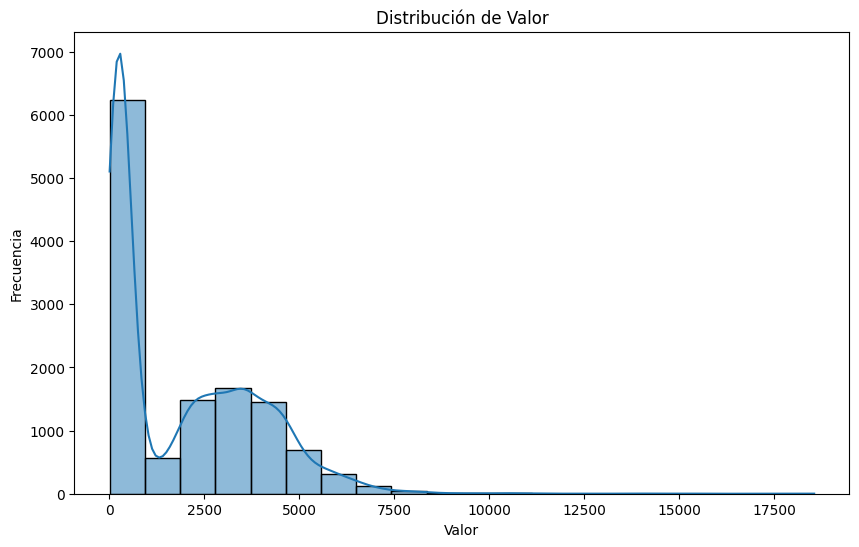

In [81]:
# Visualizamos la distribución de la principal variable numerica con un histograma
plt.figure(figsize=(10, 6))
sns.histplot(df_final['Valor'], bins=20, kde=True)
plt.title('Distribución de Valor')
plt.xlabel('Valor')
plt.ylabel('Frecuencia')
plt.show()

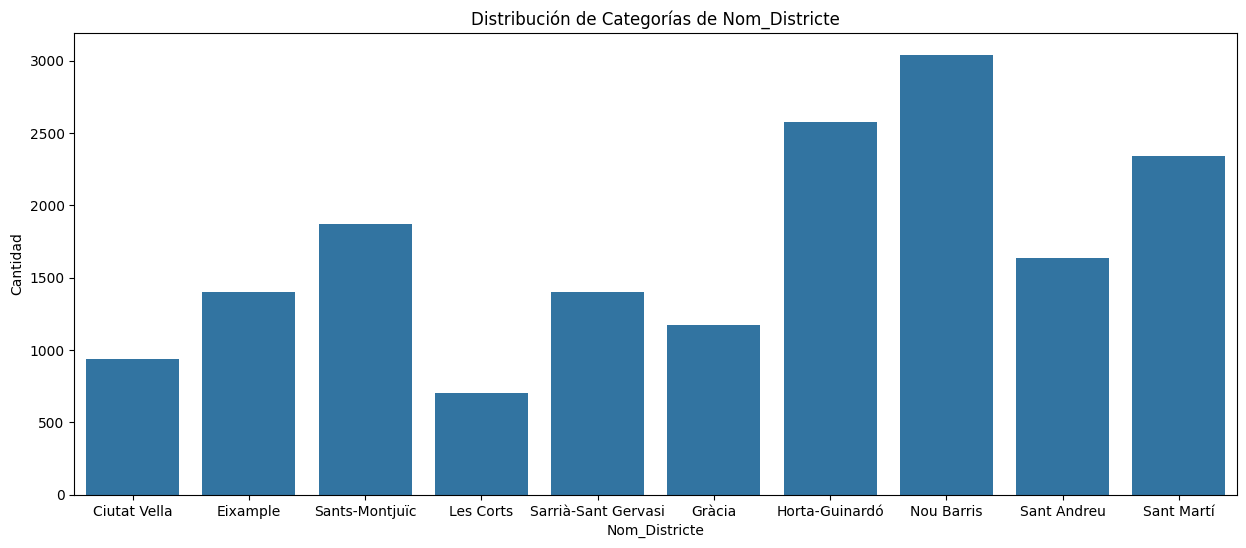

In [82]:
# Visualizamos la distribución de la variable categórica Nom_Districte utilizando un gráfico de barras
plt.figure(figsize=(15, 6))
sns.countplot(x='Nom_Districte', data=df_final)
plt.title('Distribución de Categorías de Nom_Districte')
plt.xlabel('Nom_Districte')
plt.ylabel('Cantidad')
plt.show()

Las diferencias entre cantidad entre distritos corresponde a la cantidad de barrios que contiene cada distrito.

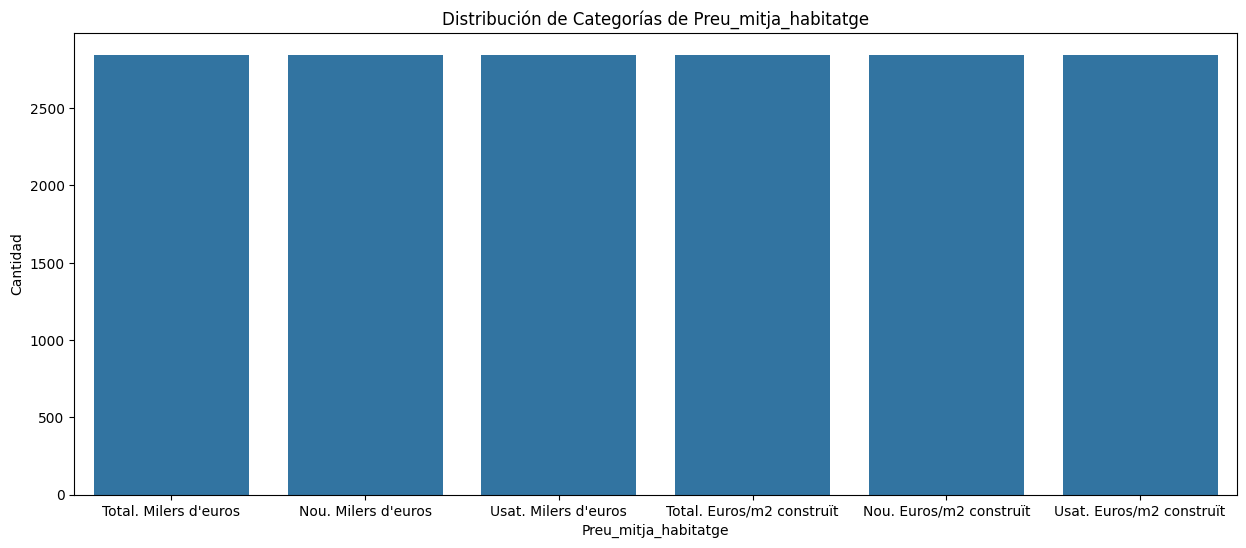

In [83]:
# Visualizamos la distribución de la variable categórica Nom_Districte utilizando un gráfico de barras
plt.figure(figsize=(15, 6))
sns.countplot(x='Preu_mitja_habitatge', data=df_final)
plt.title('Distribución de Categorías de Preu_mitja_habitatge')
plt.xlabel('Preu_mitja_habitatge')
plt.ylabel('Cantidad')
plt.show()

El objetivo del TFM esa basado en el valor de compraventa y/o unitario (€/m²) total, sin entrar a diferenciar entre vivienda nueva o usada, que podria ser objetivo de otro estudio.

Por este motivo, en el apartado de Limpieza de datos, filtraremos el dataframe para obtener solo los datos referentes a "Total. Milers d'euros" y "Total. Euros/m2 construït".

## Limpieza de datos

Verificamos que si hay datos faltantes

In [84]:
df_final.isnull().sum()

Any                        0
Trimestre                  0
Codi_Districte             0
Nom_Districte              0
Codi_Barri                 0
Nom_Barri                  0
Preu_mitja_habitatge       0
Valor                   4472
dtype: int64

In [85]:
# Utilizamos isna() para encontrar los NaN
filas_con_nan = df_final[df_final.isna().any(axis=1)]

# Muestra las filas que contienen NaN
print(filas_con_nan)

        Any  Trimestre  Codi_Districte   Nom_Districte  Codi_Barri  \
11     2022          1               3  Sants-Montjuïc          12   
41     2022          1               7  Horta-Guinardó          42   
46     2022          1               8      Nou Barris          47   
53     2022          1               8      Nou Barris          54   
55     2022          1               8      Nou Barris          56   
...     ...        ...             ...             ...         ...   
17049  2023          3               7  Horta-Guinardó          42   
17054  2023          3               8      Nou Barris          47   
17061  2023          3               8      Nou Barris          54   
17063  2023          3               8      Nou Barris          56   
17065  2023          3               9     Sant Andreu          58   

                        Nom_Barri      Preu_mitja_habitatge  Valor  
11     la Marina del Prat Vermell     Total. Milers d'euros    NaN  
41                   

Se observan 4472 filas con valores perdidos. Tal como se describe en las observaciones del dataset, corresponde a barrios donde no se han producido un minimo de 2 compraventas. Antes de ver como abordamos los valores NaN, deberemos de:
1. Explorar la variable Preu_mitja_habitatge y obtener solo aquellos datos que nos interesen
2. Comprobar y decidir que hacer con los valores NaN

### Exploracion de la variable Preu_mitja_habitatge

In [86]:
# Obtenemos los valores unicos  de la variable Preu_mitja_habitatge
valores_unicos = df_final['Preu_mitja_habitatge'].unique()

# Mostrsmos los diferentes valores únicos
print(valores_unicos)

["Total. Milers d'euros" "Nou. Milers d'euros" "Usat. Milers d'euros"
 'Total. Euros/m2 construït' 'Nou. Euros/m2 construït'
 'Usat. Euros/m2 construït']


Como se ha cpmentado anteriormente, filtraremos el dataframe para obtener solo los datos referentes a "Total. Milers d'euros" y "Total. Euros/m2 construït".

In [87]:
# Filtrar el dataFrame por Total. Milers d'euros
df_total = df_final[(df_final['Preu_mitja_habitatge'] == "Total. Milers d'euros")]

# Modificamos nombre de la variable valor
df_total = df_total.rename(columns={'Valor': 'Compraventa_Total'})

# Modificamos nombre de la variable valor
df_total = df_total.drop(columns=['Preu_mitja_habitatge'])

df_total.head()

,Any,Trimestre,Codi_Districte,Nom_Districte,Codi_Barri,Nom_Barri,Compraventa_Total
0,2022,1,1,Ciutat Vella,1,el Raval,226.1
1,2022,1,1,Ciutat Vella,2,el Barri Gòtic,453.0
2,2022,1,1,Ciutat Vella,3,la Barceloneta,215.4
3,2022,1,1,Ciutat Vella,4,"Sant Pere, Santa Caterina i la Ribera",353.3
4,2022,1,2,Eixample,5,el Fort Pienc,340.0


In [88]:
# Filtrar el dataFrame por Total. Euros/m2 construït
df_unitario = df_final[(df_final['Preu_mitja_habitatge'] == "Total. Euros/m2 construït")]

# Modificamos nombre de la variable valor
df_unitario = df_unitario.rename(columns={'Valor': 'Compraventa_Unitario'})

# Modificamos nombre de la variable valor
df_unitario = df_unitario.drop(columns=['Preu_mitja_habitatge'])

df_unitario.head()

,Any,Trimestre,Codi_Districte,Nom_Districte,Codi_Barri,Nom_Barri,Compraventa_Unitario
219,2022,1,1,Ciutat Vella,1,el Raval,3203.0
220,2022,1,1,Ciutat Vella,2,el Barri Gòtic,4755.7
221,2022,1,1,Ciutat Vella,3,la Barceloneta,4489.8
222,2022,1,1,Ciutat Vella,4,"Sant Pere, Santa Caterina i la Ribera",4739.0
223,2022,1,2,Eixample,5,el Fort Pienc,4175.4


In [89]:
# Realizar la unión de los DataFrames por múltiples claves
df_filtrado = pd.merge(df_total, df_unitario,how='left')

# Mostrar el resultado del filtrado
df_filtrado.head()

,Any,Trimestre,Codi_Districte,Nom_Districte,Codi_Barri,Nom_Barri,Compraventa_Total,Compraventa_Unitario
0,2022,1,1,Ciutat Vella,1,el Raval,226.1,3203.0
1,2022,1,1,Ciutat Vella,2,el Barri Gòtic,453.0,4755.7
2,2022,1,1,Ciutat Vella,3,la Barceloneta,215.4,4489.8
3,2022,1,1,Ciutat Vella,4,"Sant Pere, Santa Caterina i la Ribera",353.3,4739.0
4,2022,1,2,Eixample,5,el Fort Pienc,340.0,4175.4


### Comprobar y decidir que hacer con los valores NaN

En este punto volveremos a analizar si existen valores NaN en el dataframe

In [90]:
# Utilizamos isna() para encontrar los NaN
filas_con_nan = df_filtrado[df_filtrado.isna().any(axis=1)]

# Muestra las filas que contienen NaN
print(filas_con_nan)

       Any  Trimestre  Codi_Districte   Nom_Districte  Codi_Barri  \
11    2022          1               3  Sants-Montjuïc          12   
41    2022          1               7  Horta-Guinardó          42   
46    2022          1               8      Nou Barris          47   
53    2022          1               8      Nou Barris          54   
55    2022          1               8      Nou Barris          56   
...    ...        ...             ...             ...         ...   
2815  2023          3               7  Horta-Guinardó          42   
2820  2023          3               8      Nou Barris          47   
2827  2023          3               8      Nou Barris          54   
2829  2023          3               8      Nou Barris          56   
2831  2023          3               9     Sant Andreu          58   

                       Nom_Barri  Compraventa_Total  Compraventa_Unitario  
11    la Marina del Prat Vermell                NaN                   NaN  
41                 

Como se puede ver, siguen habiendo valores faltantes en 193 filas del dataframe.

In [91]:
df_filtrado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2847 entries, 0 to 2846
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Any                   2847 non-null   int64  
 1   Trimestre             2847 non-null   int64  
 2   Codi_Districte        2847 non-null   int64  
 3   Nom_Districte         2847 non-null   object 
 4   Codi_Barri            2847 non-null   int64  
 5   Nom_Barri             2847 non-null   object 
 6   Compraventa_Total     2655 non-null   float64
 7   Compraventa_Unitario  2655 non-null   float64
dtypes: float64(2), int64(4), object(2)
memory usage: 178.1+ KB


In [92]:
# Analizamos las variables numericas
df_filtrado.describe()

,Any,Trimestre,Codi_Districte,Codi_Barri,Compraventa_Total,Compraventa_Unitario
count,2847.000000,2847.000000,2847.000000,2847.000000,2655.000000,2655.000000
mean,2018.384615,2.461538,6.246575,37.000000,293.825499,3452.819661
std,2.816342,1.106033,2.788826,21.075009,179.374913,1257.713163
min,2014.000000,1.000000,1.000000,1.000000,15.900000,217.200000
25%,2016.000000,1.000000,4.000000,19.000000,169.600000,2474.350000
50%,2018.000000,2.000000,7.000000,37.000000,251.200000,3390.800000
75%,2021.000000,3.000000,8.000000,55.000000,354.000000,4279.400000
max,2023.000000,4.000000,10.000000,73.000000,1534.200000,10961.200000


## Creación de .csv

Obtenemos el archivo datosParo.csv con los datos del dataframe resultante

In [93]:
# Guardar el DataFrame en un archivo CSV
df_filtrado.to_csv('datosCompraventa.csv', index=False)

## Análisis Exploratorio de Datos (EDA)

Una vez tenemos los datos limpios continuamos con la exploracion inicial de los datos

### Variable continua Compraventa Total (Compraventa_Total)

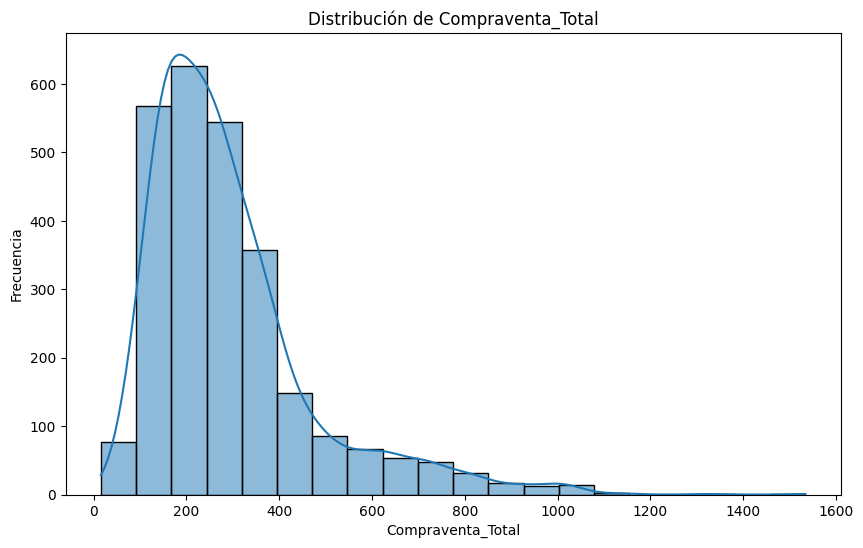

In [94]:
# Visualizamos la distribución de la principal variable numerica con un histograma
plt.figure(figsize=(10, 6))
sns.histplot(df_filtrado['Compraventa_Total'], bins=20, kde=True)
plt.title('Distribución de Compraventa_Total')
plt.xlabel('Compraventa_Total')
plt.ylabel('Frecuencia')
plt.show()

In [95]:
# Agrupamos por Any, Trimestre, Codi_Districte y Nom_Districte
df_compraventaTotal = df_filtrado.groupby(['Any','Trimestre','Codi_Districte','Nom_Districte'])['Compraventa_Total'].sum().reset_index()

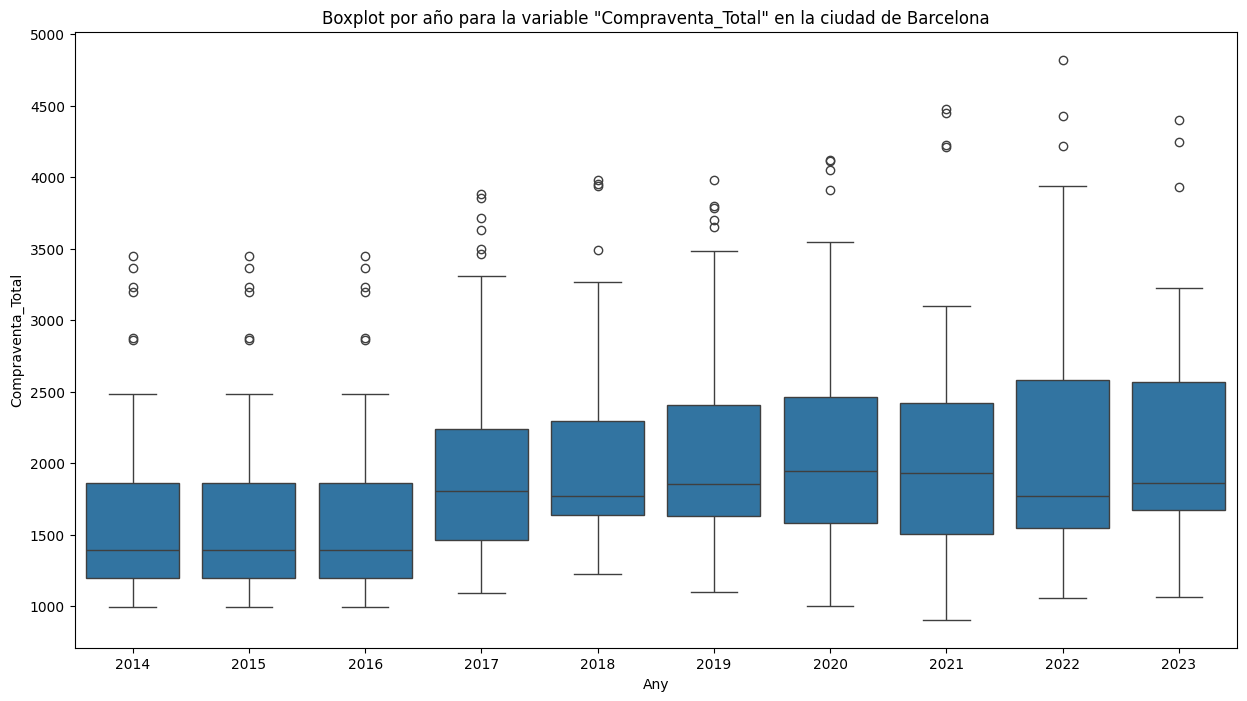

In [96]:
# Crear diagrama de caja para la variable continua "ParadosReg" en funcion de la variable categorica "Any"
plt.figure(figsize=(15, 8))
sns.boxplot(x='Any', y='Compraventa_Total', data=df_compraventaTotal)
plt.title('Boxplot por año para la variable "Compraventa_Total" en la ciudad de Barcelona')

# Mostrar el diagrama de caja
plt.show()

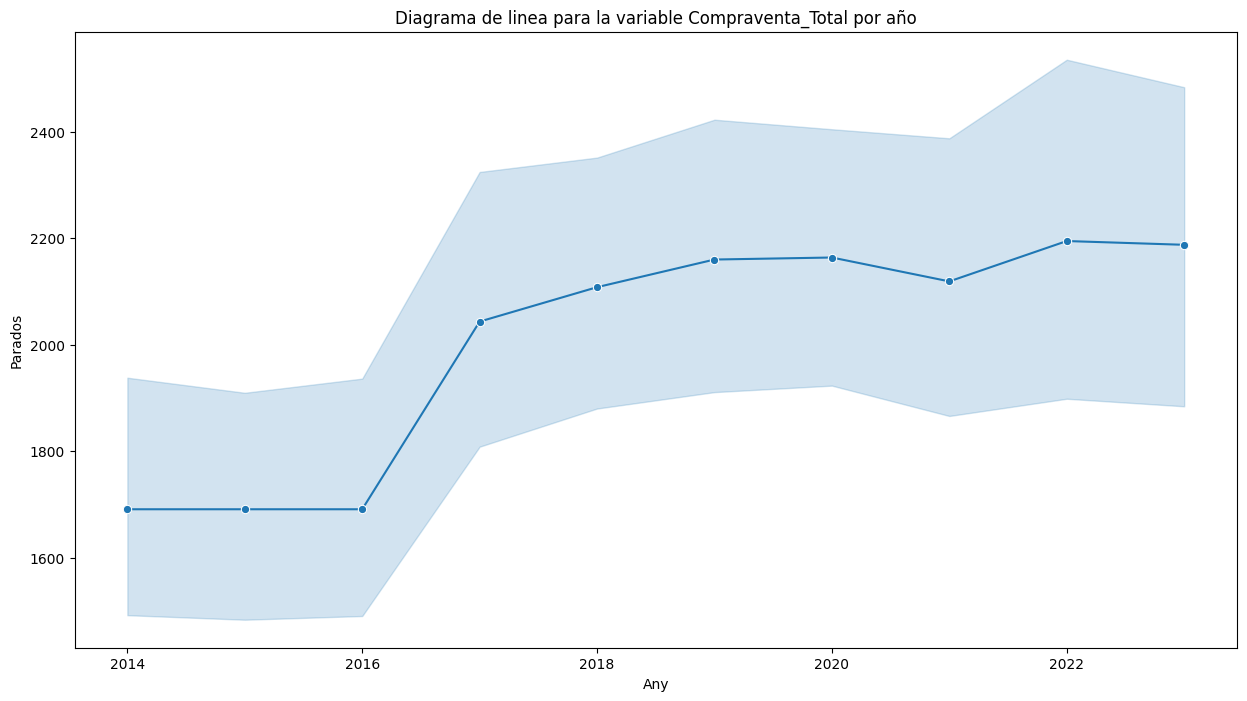

In [97]:
# Creamos un diagrama de linea
plt.figure(figsize=(15, 8))
sns.lineplot(data=df_compraventaTotal, x='Any', y='Compraventa_Total', marker='o')# Graficar los valores de la variable continua
plt.title('Diagrama de linea para la variable Compraventa_Total por año')
plt.xlabel('Any')
plt.ylabel('Parados')

plt.show()

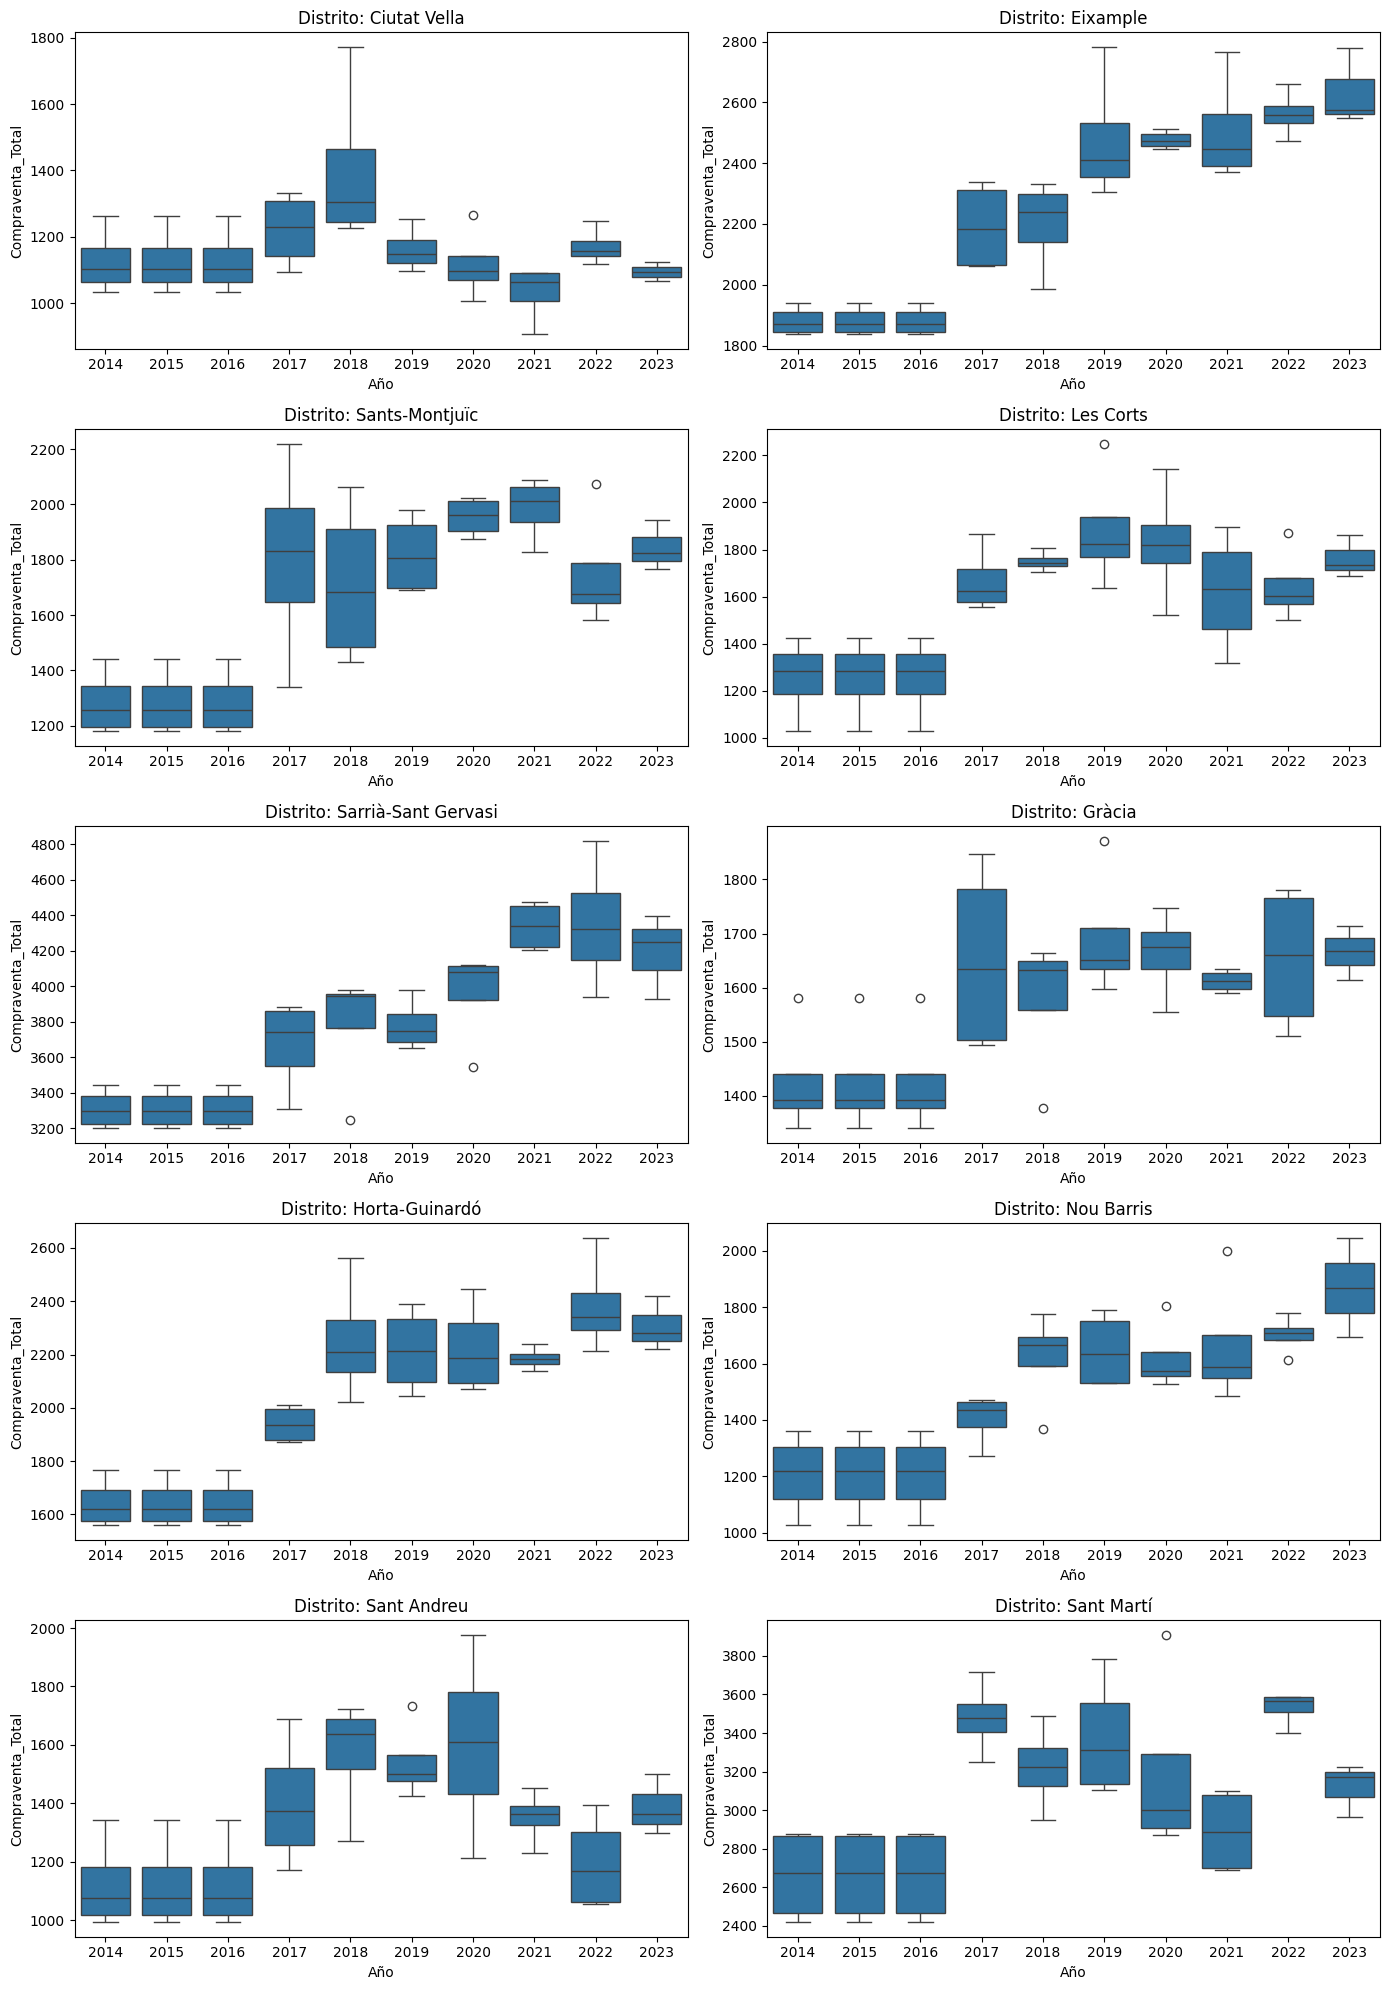

In [98]:
# Crear varios gráficos de boxplot en el mismo eje
plt.figure(figsize=(14,20))

# Primero, dividir los datos por las categorías de la primera variable categórica
for i, category in enumerate(df_compraventaTotal['Nom_Districte'].unique(), start=1):
    plt.subplot(5, 2, i)
    subset = df_compraventaTotal[df_compraventaTotal['Nom_Districte'] == category]

    # Crear un boxplot para cada subconjunto de datos
    sns.boxplot(x='Any', y='Compraventa_Total', data=subset, ax=plt.gca())
    plt.title(f'Distrito: {category}')
    plt.xlabel('Año')
    plt.ylabel('Compraventa_Total')

plt.tight_layout()
plt.show()

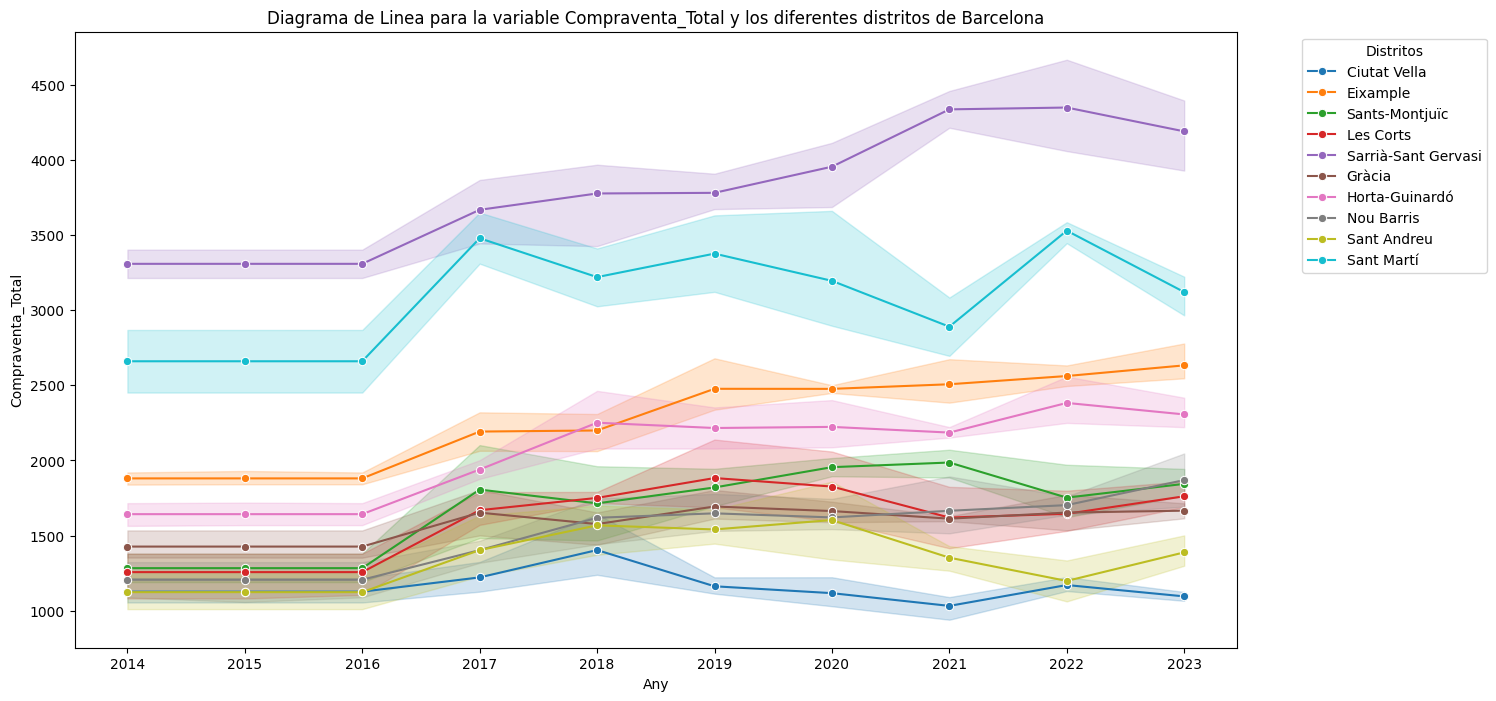

In [99]:
# Creamos un diagrama de linea
plt.figure(figsize=(15, 8))

#Sumamos los parados por distrito
summarized_data = df_compraventaTotal.groupby(['Any','Trimestre','Codi_Districte','Nom_Districte'])['Compraventa_Total'].sum().reset_index()


sns.lineplot(data=summarized_data, x='Any', y='Compraventa_Total', hue='Nom_Districte', marker='o')# Graficar los valores de la variable continua
plt.title('Diagrama de Linea para la variable Compraventa_Total y los diferentes distritos de Barcelona')
plt.xlabel('Any')
plt.ylabel('Compraventa_Total')
plt.legend(title='Distritos', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(df_compraventaTotal['Any'].unique())

# Sacamos la leyenda fuera del grafico

plt.show()

### Variable continua Compraventa Unitario (Compraventa_Unitario)

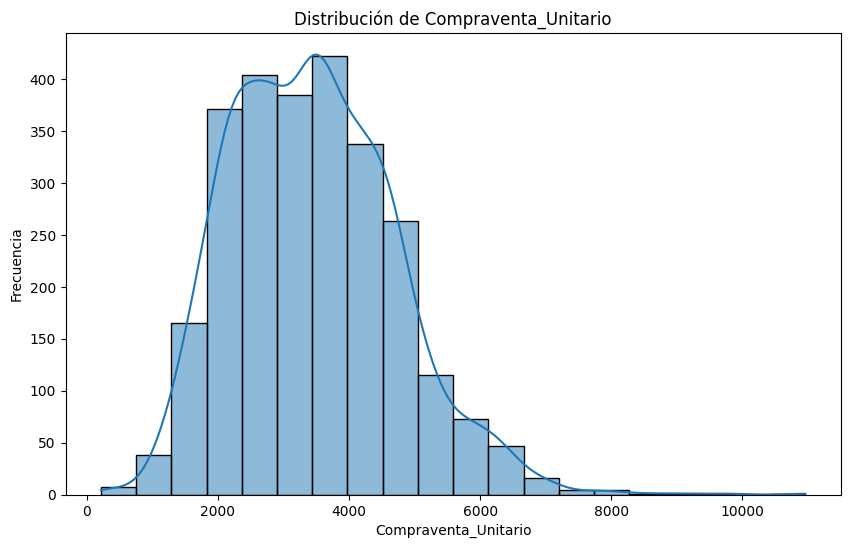

In [100]:
# Visualizamos la distribución de la principal variable numerica con un histograma
plt.figure(figsize=(10, 6))
sns.histplot(df_filtrado['Compraventa_Unitario'], bins=20, kde=True)
plt.title('Distribución de Compraventa_Unitario')
plt.xlabel('Compraventa_Unitario')
plt.ylabel('Frecuencia')
plt.show()

In [101]:
# Agrupamos la variable continua ParadosReg en función de los años
df_compraventaUnitario = df_filtrado.groupby(['Any','Trimestre','Codi_Districte','Nom_Districte'])['Compraventa_Unitario'].mean().reset_index()

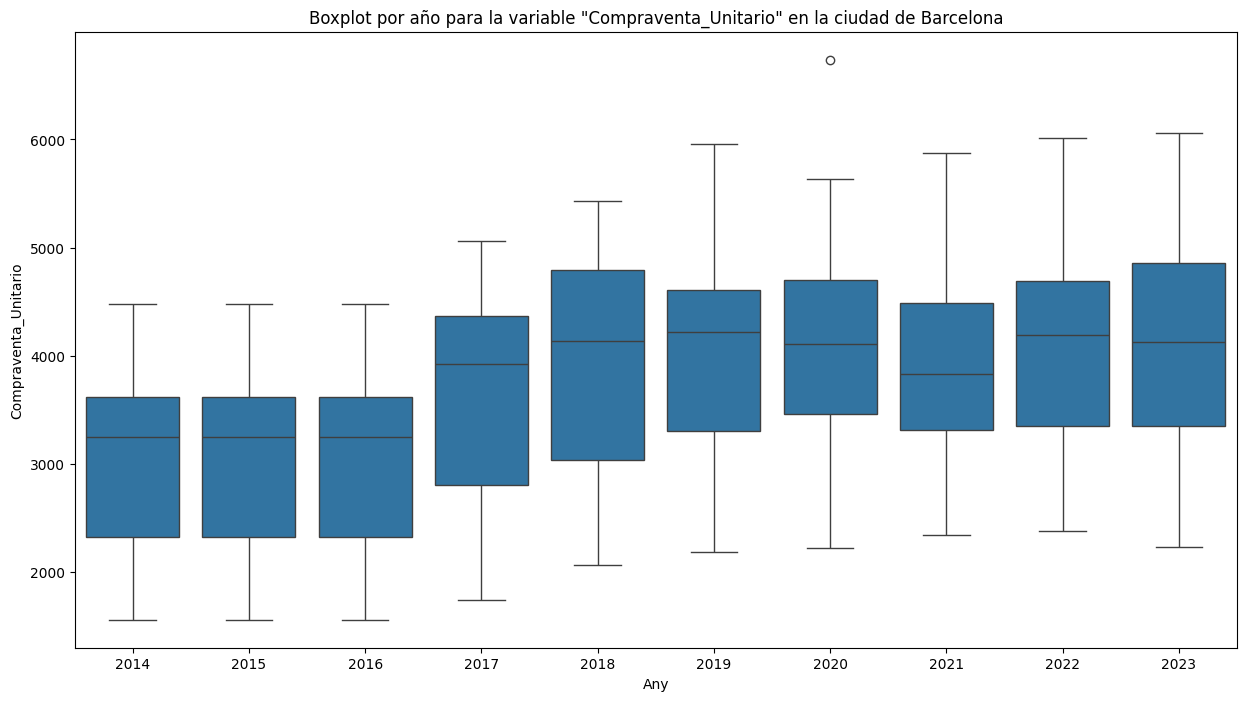

In [102]:
# Crear diagrama de caja para la variable continua NoParados en funcion de la variable categorica "Any"
plt.figure(figsize=(15, 8))
sns.boxplot(x='Any', y='Compraventa_Unitario', data=df_compraventaUnitario)
plt.title('Boxplot por año para la variable "Compraventa_Unitario" en la ciudad de Barcelona')

# Mostrar el diagrama de caja
plt.show()

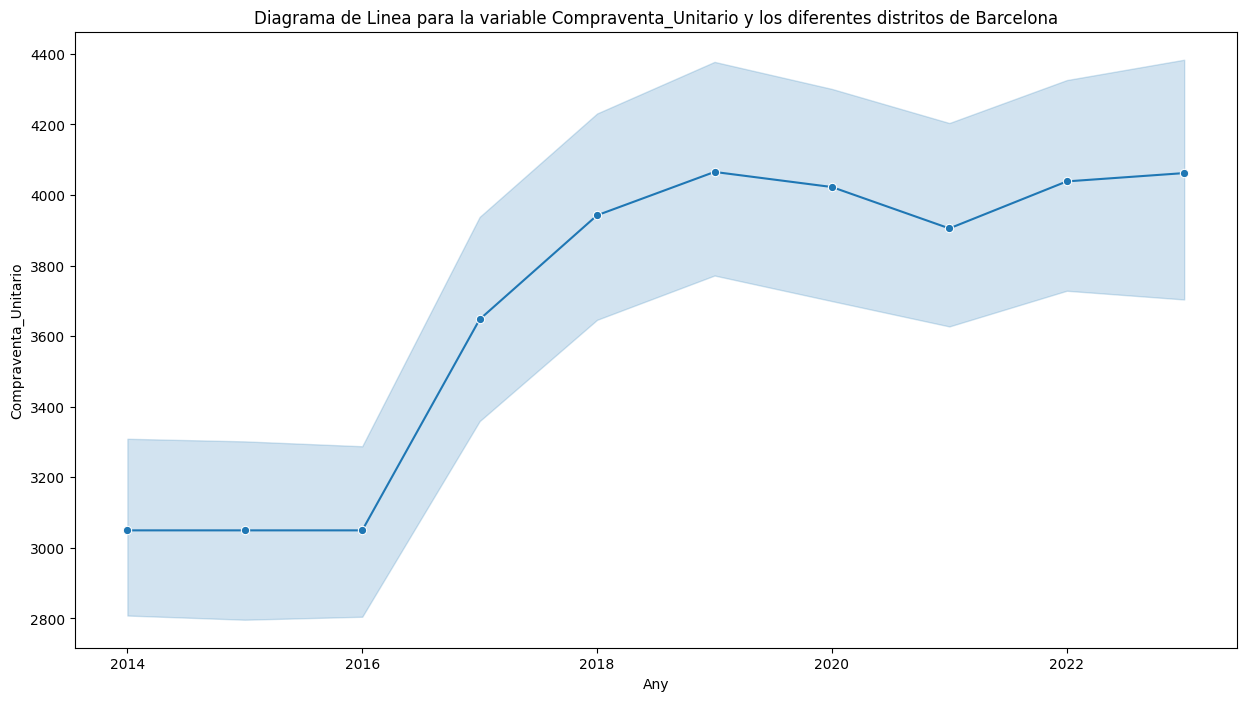

In [103]:
# Creamos un diagrama de linea
plt.figure(figsize=(15, 8))
sns.lineplot(data=df_compraventaUnitario, x='Any', y='Compraventa_Unitario', marker='o')# Graficar los valores de la variable continua
plt.title('Diagrama de Linea para la variable Compraventa_Unitario y los diferentes distritos de Barcelona')
plt.xlabel('Any')
plt.ylabel('Compraventa_Unitario')

plt.show()

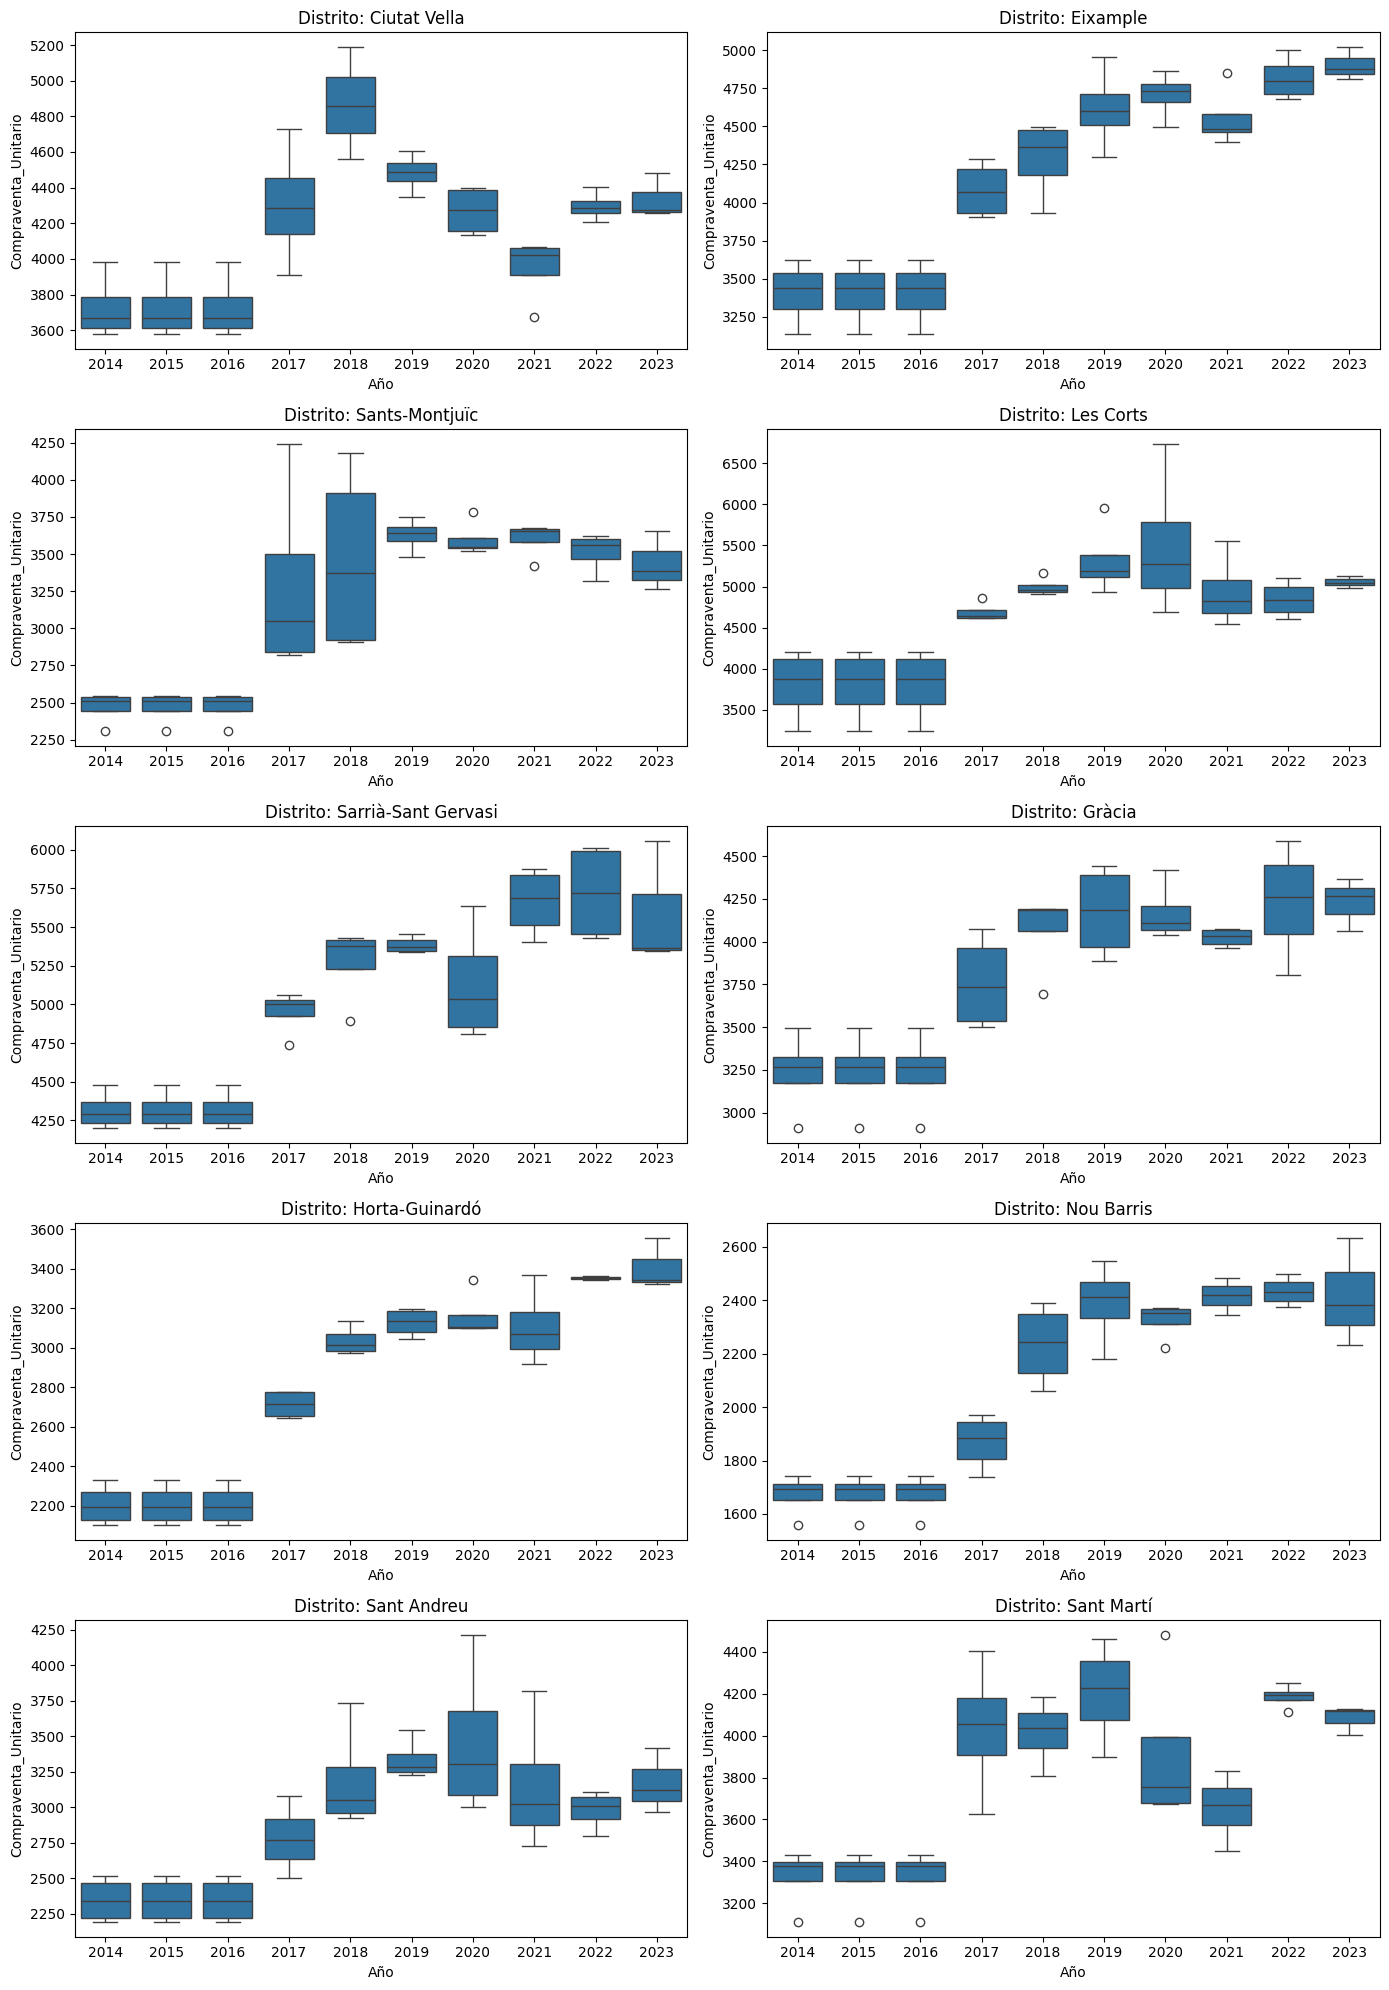

In [104]:
# Crear varios gráficos de boxplot en el mismo eje
plt.figure(figsize=(14,20))

# Primero, dividir los datos por las categorías de la primera variable categórica
for i, category in enumerate(df_compraventaUnitario['Nom_Districte'].unique(), start=1):
    plt.subplot(5, 2, i)
    subset = df_compraventaUnitario[df_compraventaUnitario['Nom_Districte'] == category]

    # Crear un boxplot para cada subconjunto de datos
    sns.boxplot(x='Any', y='Compraventa_Unitario', data=subset, ax=plt.gca())
    plt.title(f'Distrito: {category}')
    plt.xlabel('Año')
    plt.ylabel('Compraventa_Unitario')

plt.tight_layout()
plt.show()

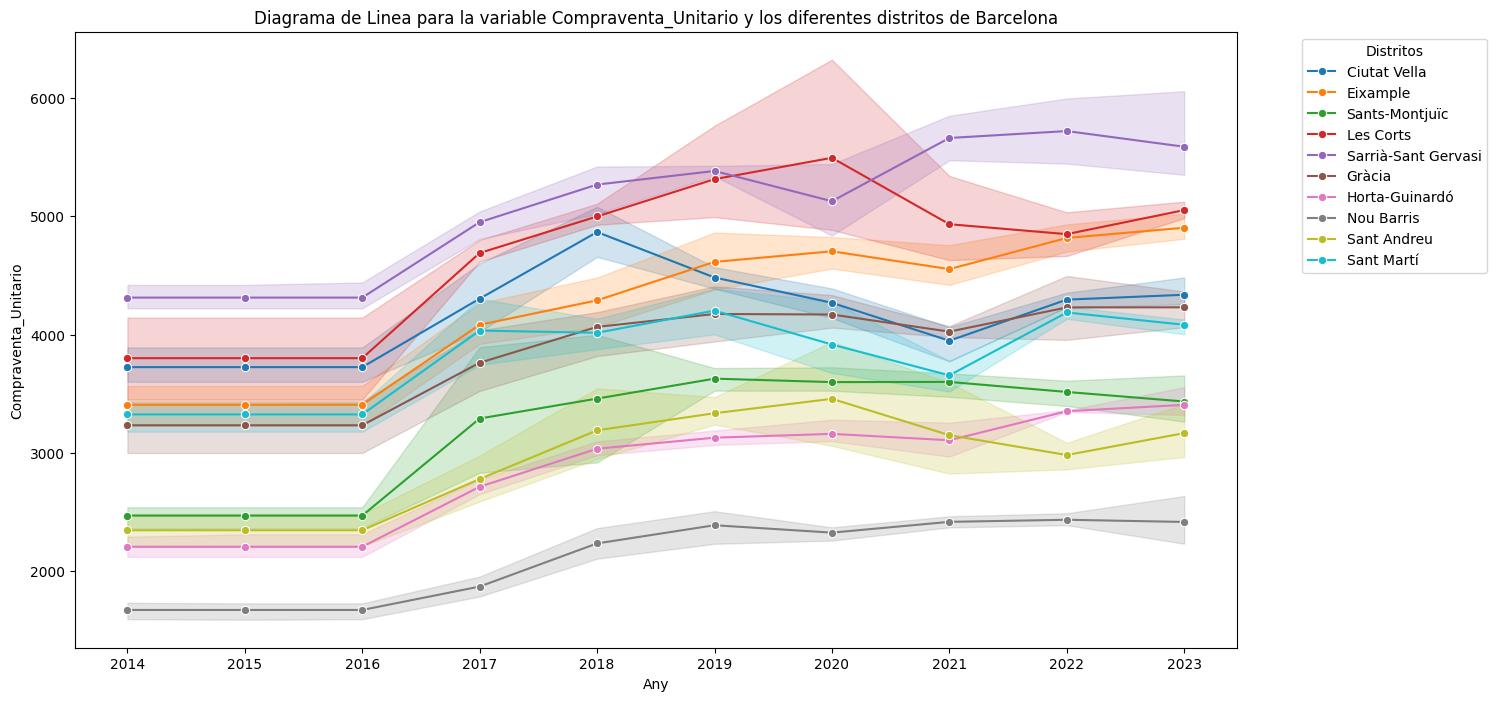

In [105]:
# Creamos un diagrama de linea
plt.figure(figsize=(15, 8))

#Sumamos los parados por distrito
summarized_data = df_compraventaUnitario.groupby(['Any','Trimestre','Codi_Districte','Nom_Districte'])['Compraventa_Unitario'].mean().reset_index()


sns.lineplot(data=summarized_data, x='Any', y='Compraventa_Unitario', hue='Nom_Districte', marker='o')# Graficar los valores de la variable continua
plt.title('Diagrama de Linea para la variable Compraventa_Unitario y los diferentes distritos de Barcelona')
plt.xlabel('Any')
plt.ylabel('Compraventa_Unitario')
plt.legend(title='Distritos', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(df_compraventaUnitario['Any'].unique())

# Sacamos la leyenda fuera del grafico

plt.show()

## Carga del Shapefile

Cargamos el archivo tipo shape con los 10 distritos de Barcelona

In [106]:
# Cargar el archivo shapefile de los distritos de Barcelona
barcelona_distritos = gpd.read_file("/content/drive/MyDrive/UOC/TFM/Datasets Indicadores/Grafo viario de las calles de la ciudad de Barcelona/BCN_UNITATS_ADM/0301040100_Districtes_UNITATS_ADM.shp")

# Mostrar información básica sobre el shapefile
print("Información del shapefile:")
barcelona_distritos.head()


Información del shapefile:


,ID_ANNEX,ANNEXDESCR,ID_TEMA,TEMA_DESCR,ID_CONJUNT,CONJ_DESCR,ID_SUBCONJ,SCONJ_DESC,ID_ELEMENT,ELEM_DESCR,...,ESTIL_ID_V,ESTIL_QGIS,VALOR1QGIS,VALOR2QGIS,COL_FARCIT,FCOL_DESCR,FHEX_COLOR,COL_DESCR,HEX_COLOR7,geometry
0,01,Grup - I,0104,Unitats Administratives,010412,Districtes,01041201,Districte,0104120101,LÃ­mit de districte,...,0,SÃ²lid,0,0,1,Negre,#000000,Negre,#000000,"POLYGON ((431733.736 4582441.816, 431827.673 4..."
1,01,Grup - I,0104,Unitats Administratives,010412,Districtes,01041201,Districte,0104120101,LÃ­mit de districte,...,0,SÃ²lid,0,0,1,Negre,#000000,Negre,#000000,"POLYGON ((432033.184 4583665.032, 432032.069 4..."
2,01,Grup - I,0104,Unitats Administratives,010412,Districtes,01041201,Districte,0104120101,LÃ­mit de districte,...,0,SÃ²lid,0,0,1,Negre,#000000,Negre,#000000,"MULTIPOLYGON (((428773.911 4580873.742, 428833..."
3,01,Grup - I,0104,Unitats Administratives,010412,Districtes,01041201,Districte,0104120101,LÃ­mit de districte,...,0,SÃ²lid,0,0,1,Negre,#000000,Negre,#000000,"POLYGON ((425054.670 4583672.560, 425062.830 4..."
4,01,Grup - I,0104,Unitats Administratives,010412,Districtes,01041201,Districte,0104120101,LÃ­mit de districte,...,0,SÃ²lid,0,0,1,Negre,#000000,Negre,#000000,"MULTIPOLYGON (((422563.071 4587486.743, 422568..."


In [107]:
# Convertimos el tipo de valor de la variable distrito a entero
barcelona_distritos['DISTRICTE'] = barcelona_distritos['DISTRICTE'].astype(int)

In [108]:
# Mostramos la nomenclatura para los graficos posteriores
print (df_compraventaTotal[['Codi_Districte', 'Nom_Districte']].drop_duplicates().to_string(index=False))

 Codi_Districte       Nom_Districte
              1        Ciutat Vella
              2            Eixample
              3      Sants-Montjuïc
              4           Les Corts
              5 Sarrià-Sant Gervasi
              6              Gràcia
              7      Horta-Guinardó
              8          Nou Barris
              9         Sant Andreu
             10          Sant Martí


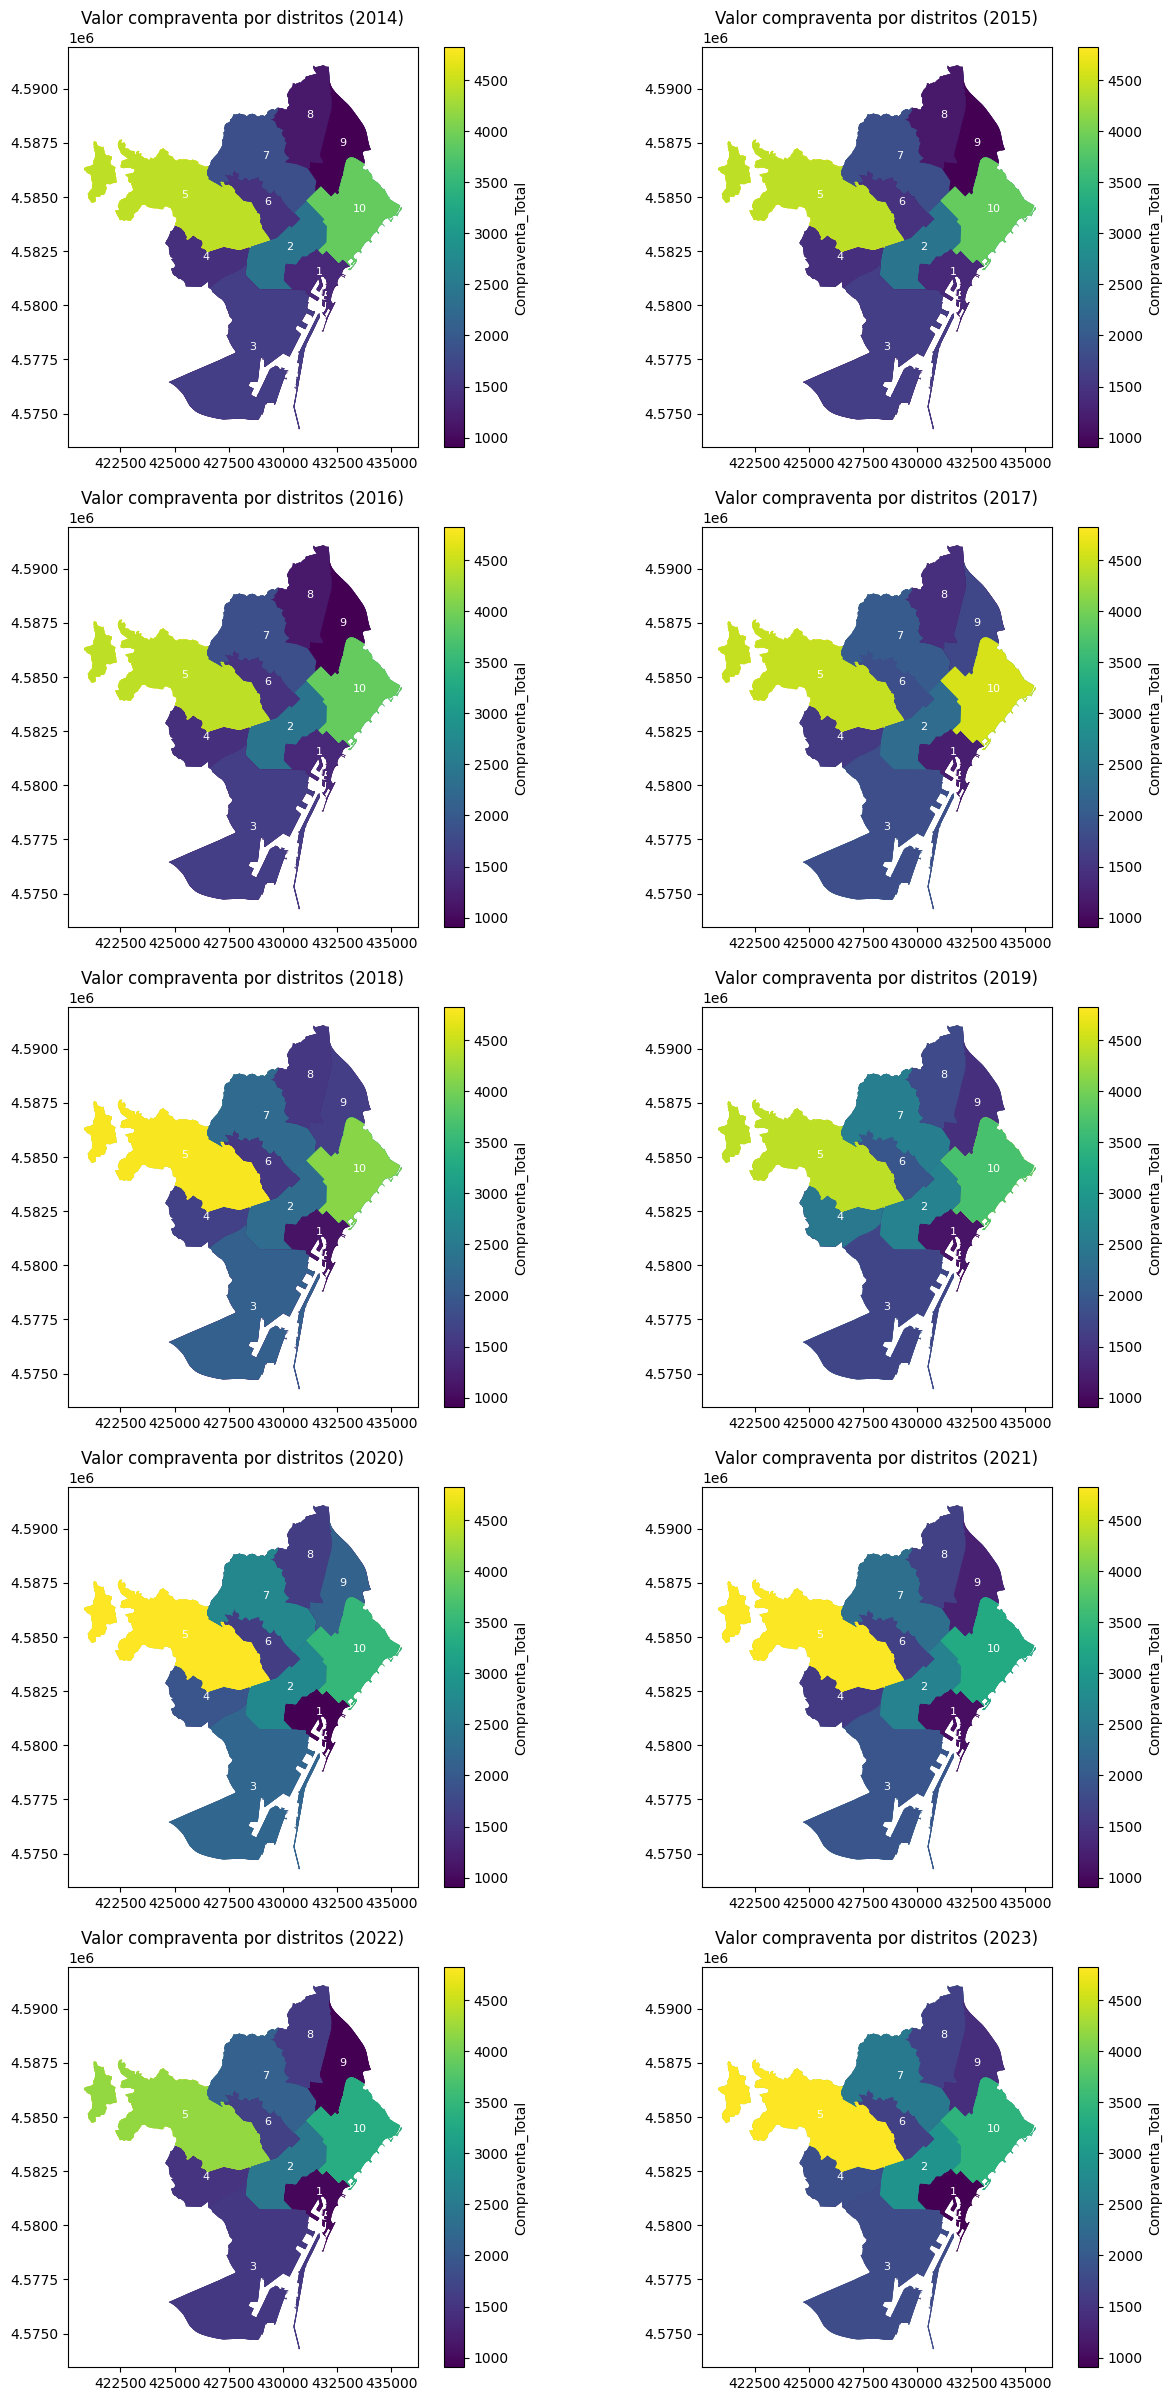

In [109]:
xmin = min(df_compraventaTotal['Compraventa_Total'])
xmax = max(df_compraventaTotal['Compraventa_Total'])

# Crear varios gráficos de boxplot en el mismo eje
plt.figure(figsize=(15, 80))

# Primero, dividir los datos por las categorías de la primera variable categórica
for i, category in enumerate(df_compraventaTotal['Any'].unique(), start=1):

    plt.subplot(13, 2, i)
    subset = df_compraventaTotal[df_compraventaTotal['Any'] == category]  # Filtrar datos para la categoría actual
    barcelona_distritos.plot(color='lightgrey',ax=plt.gca())  # Graficar el Shapefile
    merged_data = barcelona_distritos.merge(subset, how='left', left_on='DISTRICTE', right_on='Codi_Districte') # Combinar datos CSV y Shapefile

    # Trazar el GeoDataFrame con un gradiente de color
    cmap = 'viridis'  # Selecciona el mapa de color
    norm = Normalize(vmin=xmin, vmax=xmax)
    sm = ScalarMappable(cmap=cmap, norm=norm)

    merged_data.plot(ax=plt.gca(), column='Compraventa_Total', cmap='viridis', legend=False)  # Graficar los datos combinados

    # Añadir los nombres de los distritos
    for idx, row in barcelona_distritos.iterrows():
        plt.text(row.geometry.centroid.x, row.geometry.centroid.y, row['DISTRICTE'], fontsize=8,color='white')

    # Configuraciones adicionales
    plt.title('Valor compraventa por distritos (' + str(category) +')' )

    # Establecer los límites de la leyenda
    sm.set_clim(xmin, xmax)

    # Crear la leyenda con un gradiente de color
    cbar = plt.colorbar(sm, ax=plt.gca())
    cbar.set_label('Compraventa_Total')  # Establece el nombre de la variable

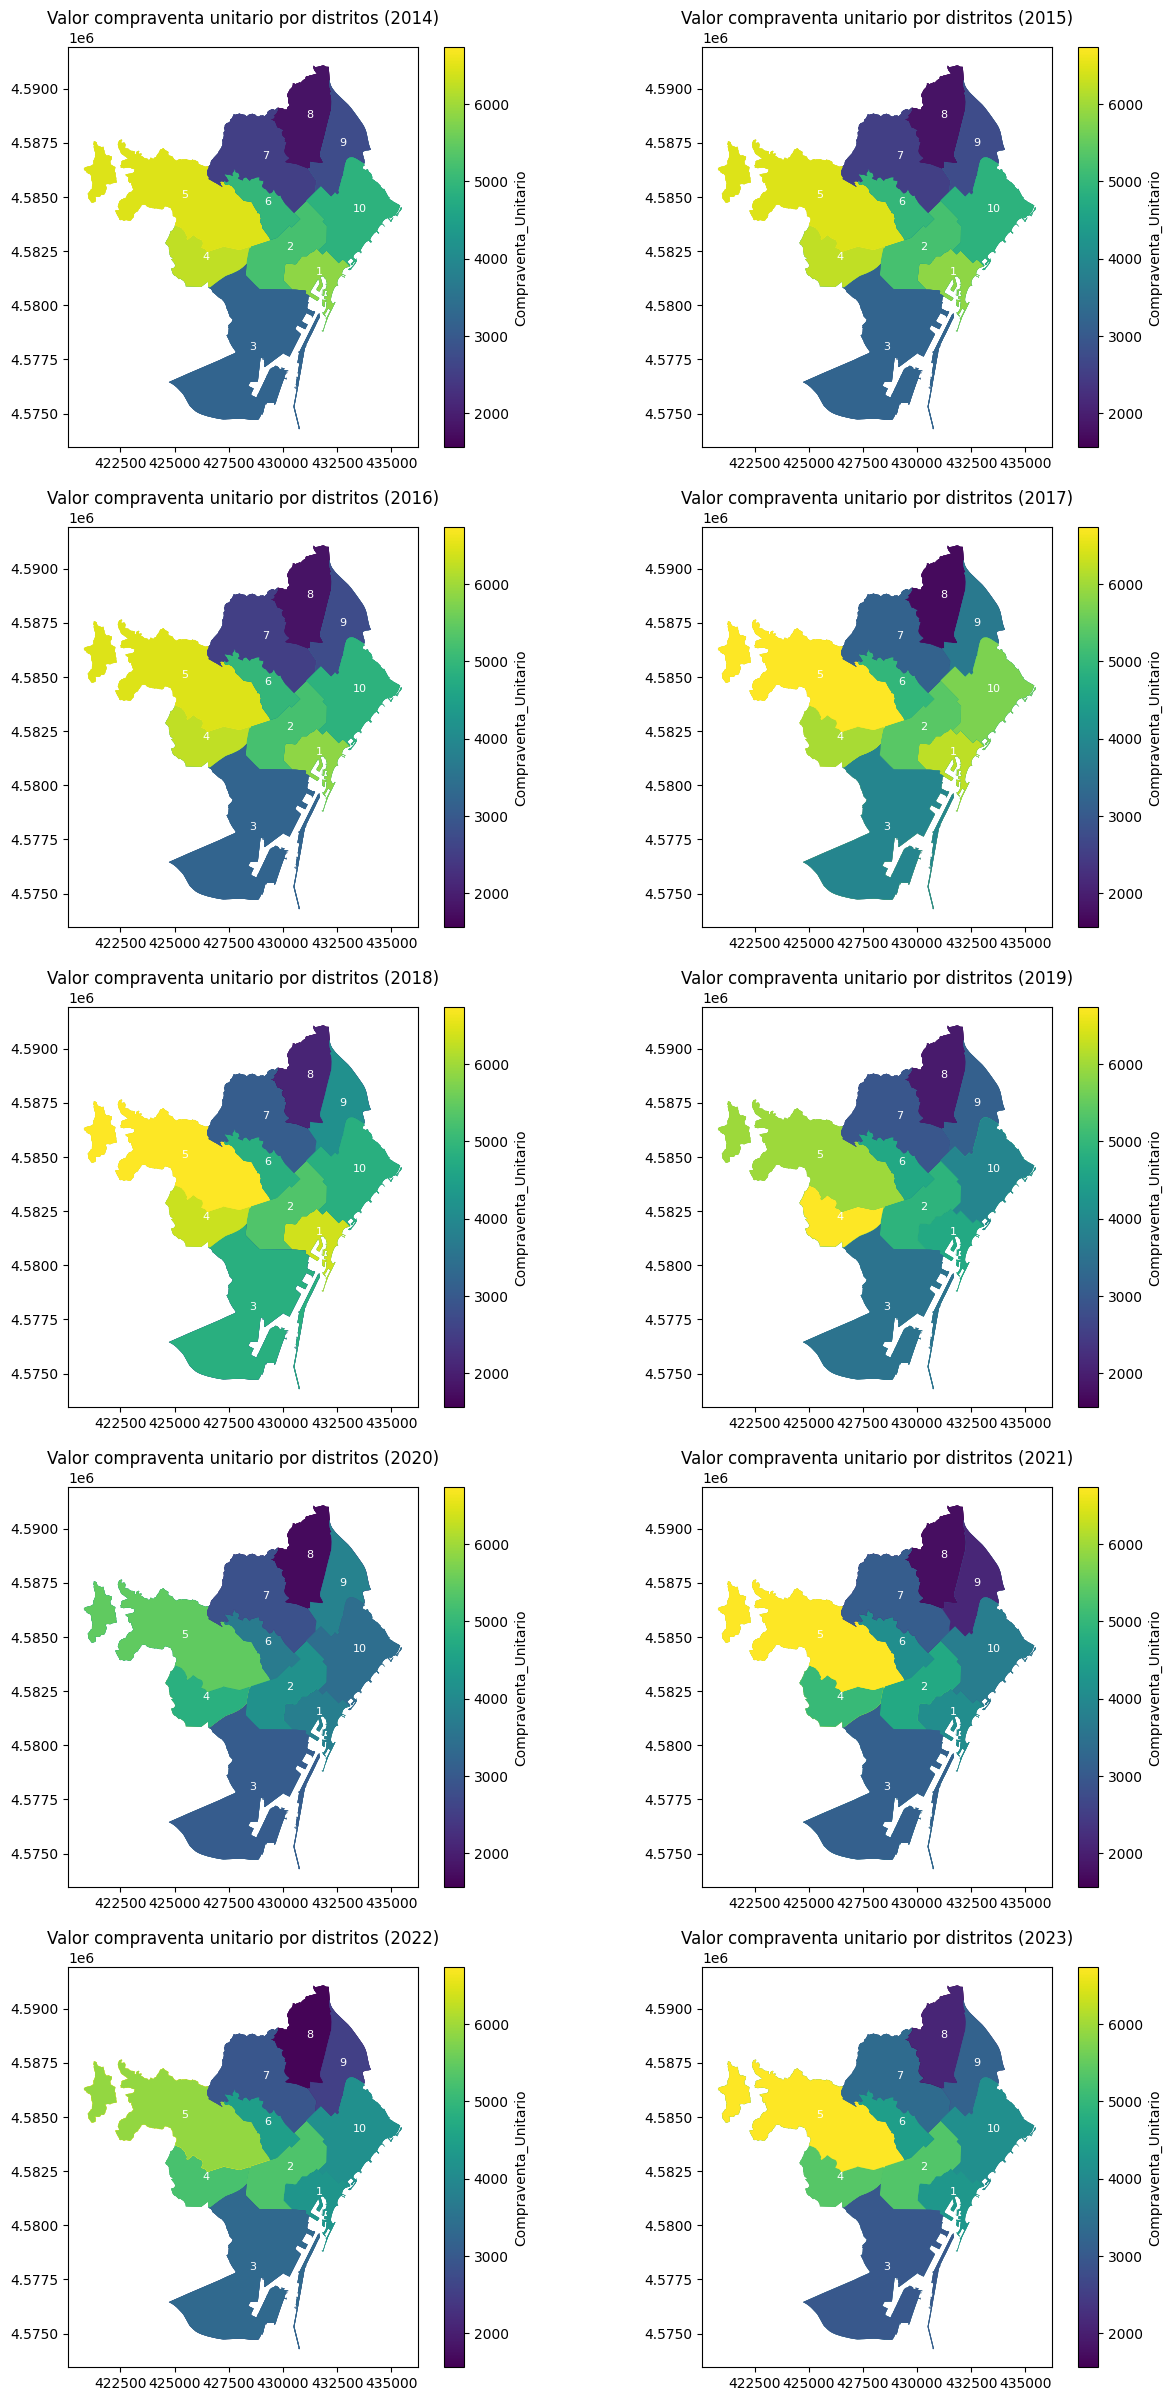

In [110]:
xmin = min(df_compraventaUnitario['Compraventa_Unitario'])
xmax = max(df_compraventaUnitario['Compraventa_Unitario'])

# Crear varios gráficos de boxplot en el mismo eje
plt.figure(figsize=(15, 80))

# Primero, dividir los datos por las categorías de la primera variable categórica
for i, category in enumerate(df_compraventaUnitario['Any'].unique(), start=1):

    plt.subplot(13, 2, i)
    subset = df_compraventaUnitario[df_compraventaUnitario['Any'] == category]  # Filtrar datos para la categoría actual
    barcelona_distritos.plot(color='lightgrey',ax=plt.gca())  # Graficar el Shapefile
    merged_data = barcelona_distritos.merge(subset, how='left', left_on='DISTRICTE', right_on='Codi_Districte') # Combinar datos CSV y Shapefile

    # Trazar el GeoDataFrame con un gradiente de color
    cmap = 'viridis'  # Selecciona el mapa de color
    norm = Normalize(vmin=xmin, vmax=xmax)
    sm = ScalarMappable(cmap=cmap, norm=norm)

    merged_data.plot(ax=plt.gca(), column='Compraventa_Unitario', cmap='viridis', legend=False)  # Graficar los datos combinados

    # Añadir los nombres de los distritos
    for idx, row in barcelona_distritos.iterrows():
        plt.text(row.geometry.centroid.x, row.geometry.centroid.y, row['DISTRICTE'], fontsize=8,color='white')

    # Configuraciones adicionales
    plt.title('Valor compraventa unitario por distritos (' + str(category) +')' )

    # Establecer los límites de la leyenda
    sm.set_clim(xmin, xmax)

    # Crear la leyenda con un gradiente de color
    cbar = plt.colorbar(sm, ax=plt.gca())
    cbar.set_label('Compraventa_Unitario')  # Establece el nombre de la variable